<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/CNN_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLASSIFICATION OF Fashion Mnist image set USING CNN

https://github.com/zalandoresearch/fashion-mnist/tree/master

## Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
## Classes are -

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

## We will use Keras to classify image as per defined class

## IMPORT LIBRARIES

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#LOAD DATASET IN TRAIN AND TEST

In [2]:
from keras.datasets import fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data() # This pull the dataset of our interest




4422102/4422102 [==============================] - 2s 0us/step


In [3]:
print("X train shape :", xtrain.shape)
print("y train shape :", ytrain.shape)
print("X test shape  :", xtest.shape)
print("y test shape  :", ytest.shape)

X train shape : (60000, 28, 28)
y train shape : (60000,)
X test shape  : (10000, 28, 28)
y test shape  : (10000,)


## SO here have input xtrain and xtest in required format (TotalSamples, height, width,TotalChannels)  Hence no need to reshape input set


In [4]:
xtrain[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 186,
        187, 186, 187, 182, 191, 194, 188, 180, 161, 161, 185,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  59, 170, 153, 141, 120, 154, 160, 161, 172,
        168, 166, 161, 165, 172, 170, 164, 139, 149, 162, 166,  21,   0,
          0,   0],
       [  0,   0,   0,   0,  79, 145, 160, 214, 123, 128, 153, 160, 164,
        158, 157, 154, 155, 170, 165, 141, 195, 193, 152, 166,  61,   0,
          0,   0],
       [  0,   0,   0,   0, 100, 157, 225, 245, 175, 113, 174, 158, 158,
        160, 155, 160, 164, 178, 188, 135, 185, 240, 201, 172, 108,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  31, 174,  28, 126, 153, 166, 152, 158,
        158, 160, 161, 157, 168, 191, 188,  18, 132, 159,   7,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  82, 187, 159, 153, 157,
        158, 162, 164, 164, 154, 187, 190,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   3,   5,   0,  37, 175, 158, 155, 162,
        158, 160, 162, 165, 153, 177, 205,   0,   0,   3,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,  25, 175, 152, 160, 158,
        161, 160, 164, 164, 161, 166, 200,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  30, 171, 147, 164, 155,
        165, 161, 165, 162, 170, 164, 162,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  57, 166, 155, 164, 166,
        161, 161, 164, 167, 165, 165, 162,  28,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0, 114, 161, 161, 166, 159,
        168, 161, 161, 172, 162, 165, 171,  50,   0,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0, 149, 157, 167, 172, 159,
        172, 164, 161, 172, 170, 160, 171,  89,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   4, 171, 164, 166, 173, 159,
        179, 166, 160, 174, 167, 162, 166, 128,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,  18, 152, 173, 160, 179, 154,
        181, 166, 164, 175, 170, 166, 170, 164,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  47, 165, 172, 167, 185, 153,
        187, 173, 165, 174, 179, 166, 166, 158,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  87, 180, 162, 179, 179, 157,
        191, 182, 165, 168, 190, 173, 165, 166,  20,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0, 105, 187, 157, 194, 175, 161,
        190, 184, 170, 158, 205, 177, 168, 171,  44,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   0, 138, 181, 158, 205, 160, 167,
        190, 198, 167, 152, 218, 186, 170, 172,  57,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   

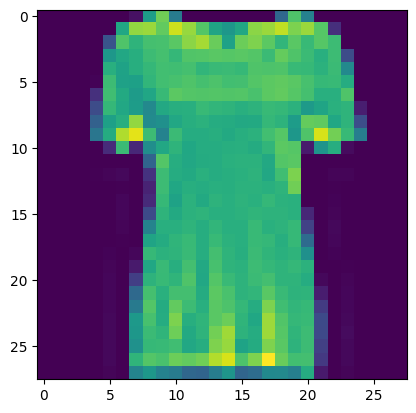

In [5]:
plt.imshow(xtrain[10])


In [6]:
xtrain[10]

#input has 3 channel (RGB) values ranging from 0 to 255
# We need to normalise it by dividing by 255

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 186,
        187, 186, 187, 182, 191, 194, 188, 180, 161, 161, 185,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  59, 170, 153, 141, 120, 154, 160, 161, 172,
        168, 166, 161, 165, 172, 170, 164, 139, 149, 162, 166,  21,   0,
          0,   0],
       [  0,   0,   0,   0,  79, 145, 160, 214, 123, 128, 153, 160, 164,
        158, 157, 154, 155, 170, 165, 141, 195, 193, 152, 166,  61,   0,
          0,   0],
       [  0,   0,   0,   0, 100, 157, 225, 245, 175, 113, 174, 158, 158,
        160, 155, 160, 164, 178, 188, 135, 185, 240, 201, 172, 108,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  31, 174,  28, 126, 153, 166, 152, 158,
        158, 160, 161, 157, 168, 191, 188,  18, 132, 159,   7,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  82, 187, 159, 153, 157,
        158, 162, 164, 164, 154, 187, 190,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   3,   5,   0,  37, 175, 158, 155, 162,
        158, 160, 162, 165, 153, 177, 205,   0,   0,   3,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,  25, 175, 152, 160, 158,
        161, 160, 164, 164, 161, 166, 200,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  30, 171, 147, 164, 155,
        165, 161, 165, 162, 170, 164, 162,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  57, 166, 155, 164, 166,
        161, 161, 164, 167, 165, 165, 162,  28,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0, 114, 161, 161, 166, 159,
        168, 161, 161, 172, 162, 165, 171,  50,   0,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0, 149, 157, 167, 172, 159,
        172, 164, 161, 172, 170, 160, 171,  89,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   4, 171, 164, 166, 173, 159,
        179, 166, 160, 174, 167, 162, 166, 128,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,  18, 152, 173, 160, 179, 154,
        181, 166, 164, 175, 170, 166, 170, 164,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  47, 165, 172, 167, 185, 153,
        187, 173, 165, 174, 179, 166, 166, 158,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  87, 180, 162, 179, 179, 157,
        191, 182, 165, 168, 190, 173, 165, 166,  20,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0, 105, 187, 157, 194, 175, 161,
        190, 184, 170, 158, 205, 177, 168, 171,  44,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   0, 138, 181, 158, 205, 160, 167,
        190, 198, 167, 152, 218, 186, 170, 172,  57,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   

#Normilise image. to scale of 255

In [7]:

# normalizing the data to help with the training
xtrain = xtrain /255
xtest = xtest/255

In [8]:
xtrain[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04313725, 0.55686275, 0.78431373,
        0.41568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.7254902 ,
        0.43921569, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.59607843, 0.83921569, 0.85098039, 0.76078431,
        0.9254902 , 0.84705882, 0.73333333, 0.58431373, 0.52941176,
        0.6       , 0.82745098, 0.85098039, 0.90588235, 0.80392157,
        0.85098039, 0.7372549 , 0.13333333, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25882353, 0.7254902 , 0.65098039, 0.70588235, 0.70980392,
        0.74509804, 0.82745098, 0.86666667, 0.77254902, 0.57254902,
        0.77647059, 0.8078

In [9]:
np.unique(ytrain)

# so we have values from 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Output Y is numpy array with 0to 9 values. we would need to convert it into 1 and 0s.
## will perform OHE. As this is numpy array, we shall use method to_categorical()
#### get_dummies will work on dataframes.Hence not using it here.

In [10]:
from keras.utils import to_categorical

n_classes = 10  # as y has 0 to 9 =10 classes

ytrain = to_categorical(ytrain, n_classes)
ytest  =  to_categorical(ytest, n_classes)
ytrain.shape, ytest.shape

((60000, 10), (10000, 10))

## Train and Validation Split

### We will split this xtrain ytrain into, x_train and x_val similarly, y_train and y_val  and fit the model.

### Once model is ready we shall apply this on xtest to see the predictions

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(xtrain,ytrain,test_size=0.1,random_state=7)

print(f'x_train {x_train.shape}')
print(f'x_val {x_val.shape}')
print(f'y_train {y_train.shape}')
print(f'y_val {y_val.shape}')


x_train (54000, 28, 28)
x_val (6000, 28, 28)
y_train (54000, 10)
y_val (6000, 10)


#Building model

In [12]:
model = Sequential()  # Stack up all layer sequentially.

# convolutional layer
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(28,28,1))) # grey scale image hence channel =1
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Flatten())   # flatten output of convolutional layer

model.add(Dense(64, activation='relu'))  # FC layer
# output layer
model.add(Dense(10, activation='softmax')) #FC layer at output . at output layer neurons should be equal to number of classes and activation Softmax for multiclass
                                           # and sigmoid for binary class

In [13]:
model.summary(line_length=100)

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d (Conv2D)                             (None, 26, 26, 32)                      320            
                                                                                                    
 max_pooling2d (MaxPooling2D)                (None, 26, 26, 32)                      0              
                                                                                                    
 flatten (Flatten)                           (None, 21632)                           0              
                                                                                                    
 dense (Dense)                               (None, 64)                              1384512        
                                                                       

#Compilation

In [14]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Multiclass - loss fuction should be categorical_crossentropy  for binary class - binary_crossentropy

In [15]:
training_logs=model.fit(x_train,y_train,validation_split=0.25,batch_size=64, epochs=5)  #Fitting the model and saving corrosponding values in variable 'history'

Epoch 1/5
633/633 [==============================] - 7s 6ms/step - loss: 0.4527 - accuracy: 0.8410 - val_loss: 0.3573 - val_accuracy: 0.8737
Epoch 2/5
633/633 [==============================] - 3s 5ms/step - loss: 0.2990 - accuracy: 0.8939 - val_loss: 0.3187 - val_accuracy: 0.8853
Epoch 3/5
633/633 [==============================] - 3s 4ms/step - loss: 0.2419 - accuracy: 0.9125 - val_loss: 0.2985 - val_accuracy: 0.8936
Epoch 4/5
633/633 [==============================] - 3s 4ms/step - loss: 0.2011 - accuracy: 0.9279 - val_loss: 0.2887 - val_accuracy: 0.8984
Epoch 5/5
633/633 [==============================] - 3s 5ms/step - loss: 0.1700 - accuracy: 0.9392 - val_loss: 0.2933 - val_accuracy: 0.9012


In [16]:
training_logs.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

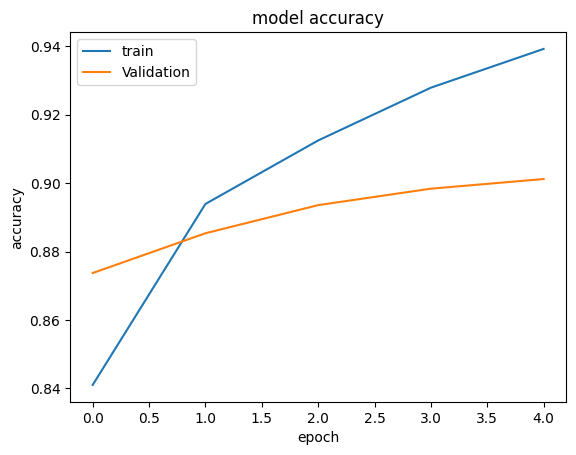

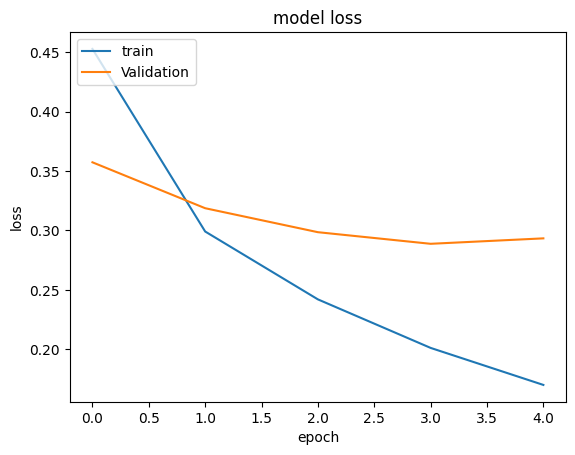

In [17]:
import matplotlib.pyplot as plt
plt.plot(training_logs.history['accuracy'])
plt.plot(training_logs.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(training_logs.history['loss'])
plt.plot(training_logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()



## Traning and validation accuracy after final epoch

In [18]:
training_logs.history['accuracy'][-1],training_logs.history['val_accuracy'][-1],training_logs.history['loss'][-1],training_logs.history['val_loss'][-1]

(0.9392345547676086,
 0.9011852145195007,
 0.16997018456459045,
 0.2932875454425812)

##PREDICTION

In [19]:
xtest.shape

(10000, 28, 28)

In [20]:
ypred=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


##evalute loss and accuracy on test set



In [21]:
test_loss, test_acc = model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2958 - accuracy: 0.8952


In [22]:
test_loss, test_acc

(0.2957972586154938, 0.8952000141143799)

##Confusion Matrix

In [23]:
ypred

array([[8.8873403e-06, 6.8774156e-08, 2.7093899e-06, ..., 2.9145887e-03,
        8.6495784e-05, 9.9688393e-01],
       [6.7818547e-07, 1.5525608e-12, 9.9993229e-01, ..., 4.6731659e-15,
        6.5398333e-11, 6.5491483e-14],
       [1.5599277e-07, 9.9999988e-01, 9.7220496e-12, ..., 2.9397799e-15,
        1.1910103e-09, 1.0716167e-14],
       ...,
       [1.3643016e-05, 9.0529995e-10, 2.9690895e-05, ..., 5.0014401e-06,
        9.9916410e-01, 2.1482346e-10],
       [1.7780073e-08, 9.9999869e-01, 8.2322170e-12, ..., 2.5910255e-11,
        3.8660328e-11, 1.6839042e-11],
       [4.9907522e-04, 4.0520932e-05, 4.9531325e-03, ..., 2.8648293e-01,
        6.0316194e-03, 1.4438074e-03]], dtype=float32)

In [24]:
ypred_class = np.argmax(ypred, axis=1)
ypred_class

array([9, 2, 1, ..., 8, 1, 5])

In [25]:
ytest_class = np.argmax(ytest, axis=1)
ytest_class

array([9, 2, 1, ..., 8, 1, 5])

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest_class, ypred_class)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[838   1  28  15   2   3 104   0   9   0]
 [  1 981   0  14   2   0   1   0   1   0]
 [ 14   1 883   7  48   0  47   0   0   0]
 [ 21  11  13 895  23   0  37   0   0   0]
 [  2   2  91  30 824   0  51   0   0   0]
 [  0   0   1   1   0 961   0  24   2  11]
 [121   2 103  24  62   0 678   0  10   0]
 [  0   0   0   0   0   8   0 970   0  22]
 [  3   1   4   7   2   3   5   4 971   0]
 [  1   0   0   0   0   5   1  42   0 951]]


# Image classification for user given image.




##Defining list for label/class which we have

In [27]:
# Existing labels mapping


class_labels= {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',
               6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot',
}


## Creating function for prediction

In [28]:
def func_prediction(model,xinput):
  xinput=xinput.reshape(1,28,28,1) # reshape. 1 at begining is needed to cnn to work with 4D vector. and 1 at end is becuase grayscale channel
  pred=model.predict(xinput)
  return pred

In [29]:
xinput=xtest[500]  # For now just taking vector from xtest set and applying as user input

pred=func_prediction(model,xinput)
pred

1/1 [==============================] - 0s 106ms/step


array([[1.2752407e-03, 3.8277212e-05, 9.9571335e-01, 8.1085618e-06,
        4.4253247e-04, 7.6003303e-08, 2.5055802e-03, 6.4272319e-07,
        1.6173854e-05, 1.0558316e-07]], dtype=float32)

In [30]:
pred_class = np.argmax(pred, axis=1)  ## argmax reverts OHE values to its orginal one.
pred_class

#This is giving the class of  output  for given xinput. ie class 3

array([2])

### Decoding this class label

In [31]:
#variable pred_class is numpy array,  extract value of 0th postion ie 3 and store and index

# get the lable at that index number from class_labels

pred_class_index = pred_class[0]
pred_label = class_labels.get(pred_class_index)
pred_class_index, pred_label

(2, 'Pullover')

## Visualisation

Text(0.5, 0, 'Pullover')

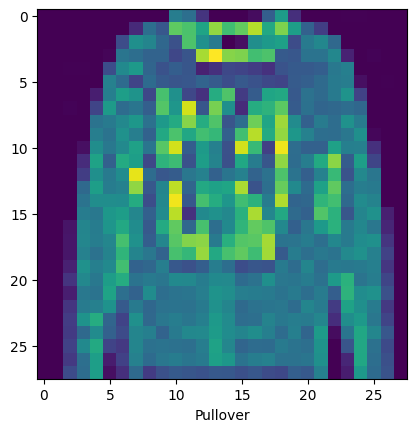

In [32]:
plt.imshow(xinput)
plt.xlabel(pred_label)


#Saving the Trained model using pickle

In [33]:
import pickle

with open('CNN_fashion_mnist.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# To load the trained model

#upload file "CNN_fashion_mnist.pkl" at root path "/content/CNN_fashion_mnist.pkl"  and then run following

"""
with open('CNN_fashion_mnist.pkl', 'rb') as f:
    model = pickle.load(f)
"""

# further model can be used to test the data.